# Decision Tree
adalah salah satu metode klasifikasi yang paling populer karena muadh dimengerti oleh manusia , decision tree biasanya digunakan untuk pengelolaan pola dan termasuk pengelolaan pola secara statistik

# Struktur dari Decision tree
decision tree dibentuk dari 3 tipe simpul yaitu simpul root , simpul perantara dan simpul leaf
1.Simpul root merupakan sebuah titik awal dari decision tree
2.Simpul perantara biasanya berhubungan dengan suatu pertanyaan
3.Simpul leaf suatu keputusan akhir atau kelas target untuk suatu decision tree itu sendiri


### import library

In [16]:
#numpy berfungsi untuk mengolah data numerik
import numpy as np
#pandas berfungsi untuk memanipulasi data
import pandas as pd
#matplotlib untuk membuat plot
import matplotlib.pyplot as plt
#
import seaborn as sns
#ini adalah metode yang dipakai
from sklearn.tree import DecisionTreeClassifier
#untuk memudahkan dalam pembagian data train dan test
from sklearn.model_selection import train_test_split

### Menampilkan isi data set
Disini ingin melihat isi dari dataset tsb , yaitu menu.csv

In [17]:
mcd=pd.read_csv("menu.csv")
mcd.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [18]:
#Menghapus colom yang tidak diperlukan 
mcd = mcd.drop(['Item','Serving Size','Calories from Fat','Total Fat','Total Fat (% Daily Value)','Saturated Fat','Saturated Fat (% Daily Value)','Trans Fat','Cholesterol','Cholesterol (% Daily Value)','Sodium','Sodium (% Daily Value)','Carbohydrates','Carbohydrates (% Daily Value)','Dietary Fiber','Dietary Fiber (% Daily Value)','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)','Iron (% Daily Value)'],axis=1)
mcd.head()

,Category,Calories,Sugars,Protein
0,Breakfast,300,3,17
1,Breakfast,250,3,18
2,Breakfast,370,2,14
3,Breakfast,450,2,21
4,Breakfast,400,2,21


### Dibawah ini berfungsi untuk melihat info dari kategori yang dipakai

In [19]:
mcd.info

<bound method DataFrame.info of        Category  Calories  Sugars  Protein
0     Breakfast       300       3       17
1     Breakfast       250       3       18
2     Breakfast       370       2       14
3     Breakfast       450       2       21
4     Breakfast       400       2       21
..          ...       ...     ...      ...
255  Smoothies        510      64       12
256  Smoothies        690      85       15
257  Smoothies        340      43        8
258  Smoothies        810     103       21
259  Smoothies        410      51       10

[260 rows x 4 columns]>

### Membuat plot 
Plot berfungsi untuk memunculkan grafik dari pada data set tersebut

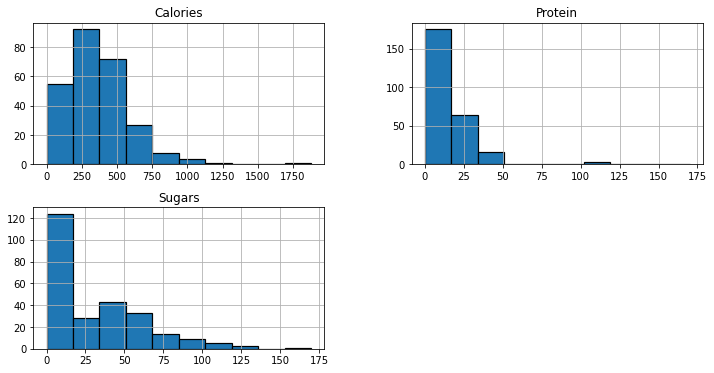

In [20]:
mcd.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### Split data (train dan test data)

In [21]:
#Menggunakan data training 70% dan data testing sebesar 30%
#Disini pula memiliki fungsi print yang mana untuk memuncul nilai dari train dan test
train, test = train_test_split(mcd, test_size = 0.3)
print(train.shape)
print(test.shape)

(182, 4)
(78, 4)


In [22]:
#Memasukan nilai x yaitu Calories , Sugars , Protein
#Memasukan nilai y yaitu berbentuk Category
train_X = train[['Calories','Sugars','Protein']]
train_y=train.Category
test_X= test[['Calories','Sugars','Protein']]
test_y =test.Category

#### Hasil nilai dari perbandingan X train dan X test

In [23]:
train_X.head()

,Calories,Sugars,Protein
92,330,3,14
235,210,44,3
83,390,5,15
15,520,3,18
259,410,51,10


In [24]:
test_X.head()

,Calories,Sugars,Protein
61,610,11,32
233,260,54,3
31,1090,17,36
247,560,77,12
185,390,50,12


#### Berikut hasil nilai dari percobaan training y
Dapat dilihat pula disini memakai category yang mana category yaitu memiliki bentuk sebagai object

In [25]:
train_y.head()

92        Snacks 
235    Smoothies 
83       Chicken 
15      Breakfast
259    Smoothies 
Name: Category, dtype: object

### Training Model

In [26]:
mcdTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
mcdTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### entropy adalah untuk mengukur “seberapa informatifnya” sebuah node

In [27]:
mcdTree.fit(train_X,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Prediksi

In [28]:
predTree = mcdTree.predict(test_X)

In [29]:
#Menampilkan hasil dari nilai prediksi 
print (predTree [0:5])
#Menampilkan hasil dari nilai yang sebenarnya
print (test_y [0:5])

['Chicken ' 'Coffee ' 'Chicken ' 'Coffee ' 'Coffee ']
61       Chicken 
233    Smoothies 
31      Breakfast
247    Smoothies 
185       Coffee 
Name: Category, dtype: object


### Evaluasi Model
kemudian melakukan mengevaluasi apakah model yang kamu buat memiliki akurasi yang baik atau belum

In [30]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(test_y, predTree))

DecisionTrees's Accuracy:  0.6025641025641025


### visualiasi

In [134]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

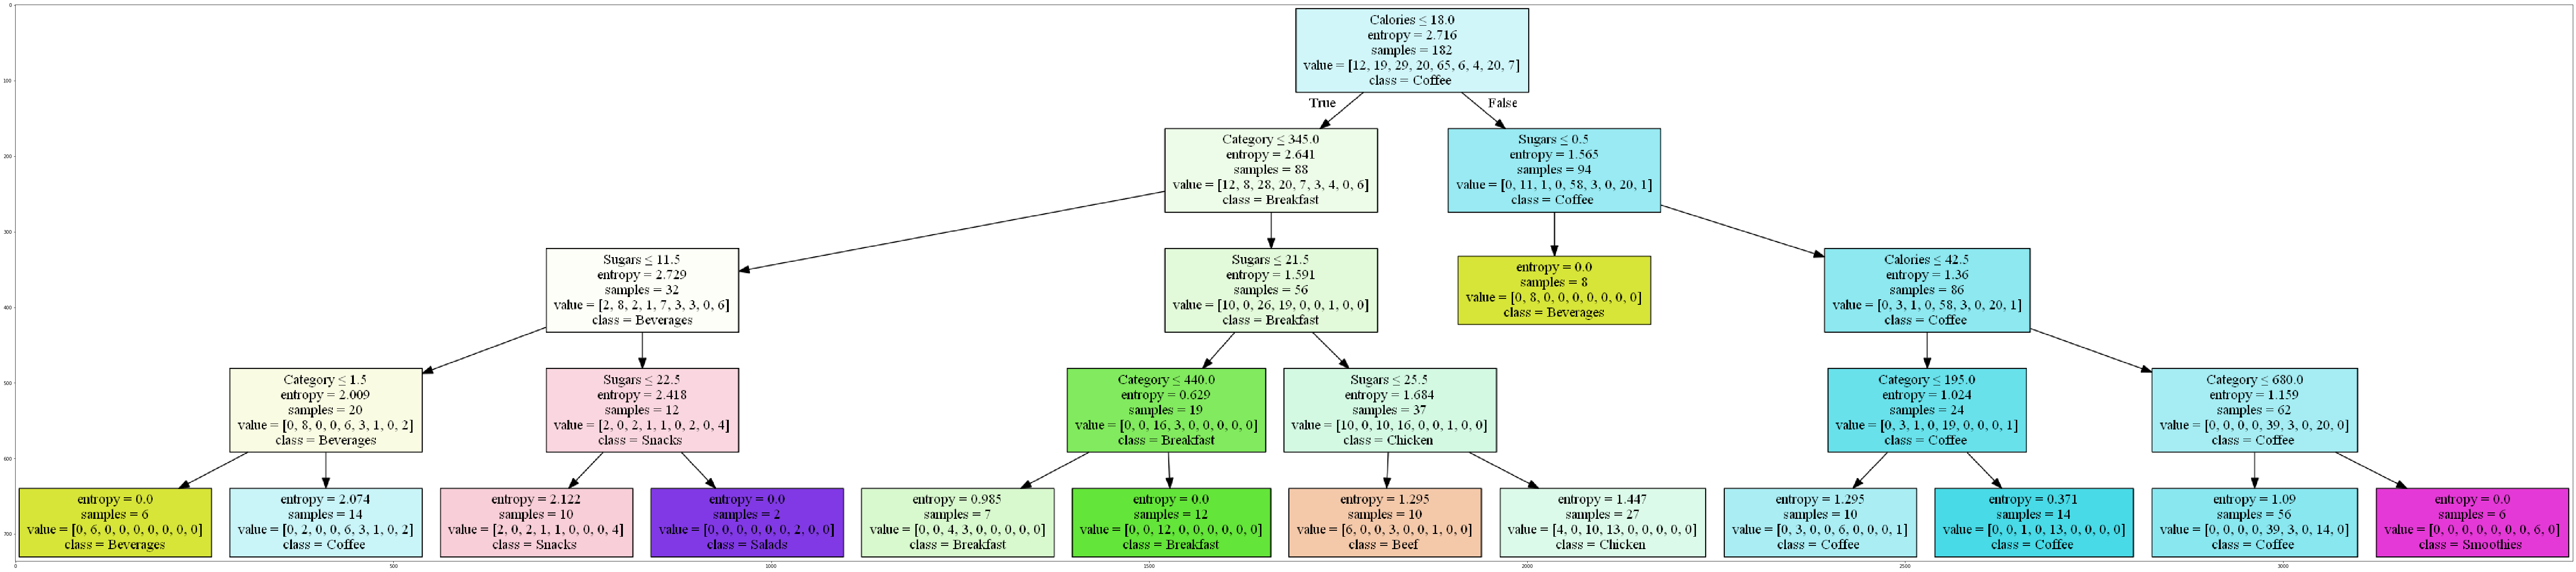

In [135]:
dot_data = StringIO()
filename = "mcdTree.png"
featureNames = mcd.columns[0:3]
targetNames = mcd["Category"].unique().tolist()
out=tree.export_graphviz(mcdTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(train_y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

Kesimpulan : Model ini menghasilkan peforma akurasi sebesar 60% 